In [2]:
"""
Generate a dataset of alloys based on MPEA dataset clustering
"""

'\nGenerate a dataset of alloys based on MPEA dataset clustering\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from alloy_dataset_analysis import *

In [4]:
# Load MPEA dataset
mpea_hardness_full = pd.read_csv("../datasets/curated_MPEA_initial_training_hardness_value.csv")
mpea_hardness = mpea_hardness_full.iloc[:,:30] # Only consider element columns
print(mpea_hardness)
X = np.array(mpea_hardness)

# Elements (colummn labels)
elems = list(mpea_hardness.columns)
print(elems)

      Ag     Al    B    C   Ca     Co     Cr   Cu     Fe   Ga  ...   Sc   Si  \
0    0.0  0.077  0.0  0.0  0.0  0.308  0.000  0.0  0.308  0.0  ...  0.0  0.0   
1    0.0  0.143  0.0  0.0  0.0  0.286  0.000  0.0  0.286  0.0  ...  0.0  0.0   
2    0.0  0.200  0.0  0.0  0.0  0.267  0.000  0.0  0.267  0.0  ...  0.0  0.0   
3    0.0  0.250  0.0  0.0  0.0  0.250  0.000  0.0  0.250  0.0  ...  0.0  0.0   
4    0.0  0.000  0.0  0.0  0.0  0.333  0.000  0.0  0.333  0.0  ...  0.0  0.0   
..   ...    ...  ...  ...  ...    ...    ...  ...    ...  ...  ...  ...  ...   
320  0.0  0.204  0.0  0.0  0.0  0.000  0.204  0.0  0.204  0.0  ...  0.0  0.0   
321  0.0  0.200  0.0  0.0  0.0  0.000  0.200  0.0  0.200  0.0  ...  0.0  0.0   
322  0.0  0.196  0.0  0.0  0.0  0.000  0.196  0.0  0.196  0.0  ...  0.0  0.0   
323  0.0  0.190  0.0  0.0  0.0  0.000  0.190  0.0  0.190  0.0  ...  0.0  0.0   
324  0.0  0.000  0.0  0.0  0.0  0.000  0.250  0.0  0.000  0.0  ...  0.0  0.0   

      Sn   Ta     Ti    V     W    Y   

/Users/maitreyeesharma/opt/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maitreyeesharma/opt/anaconda3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


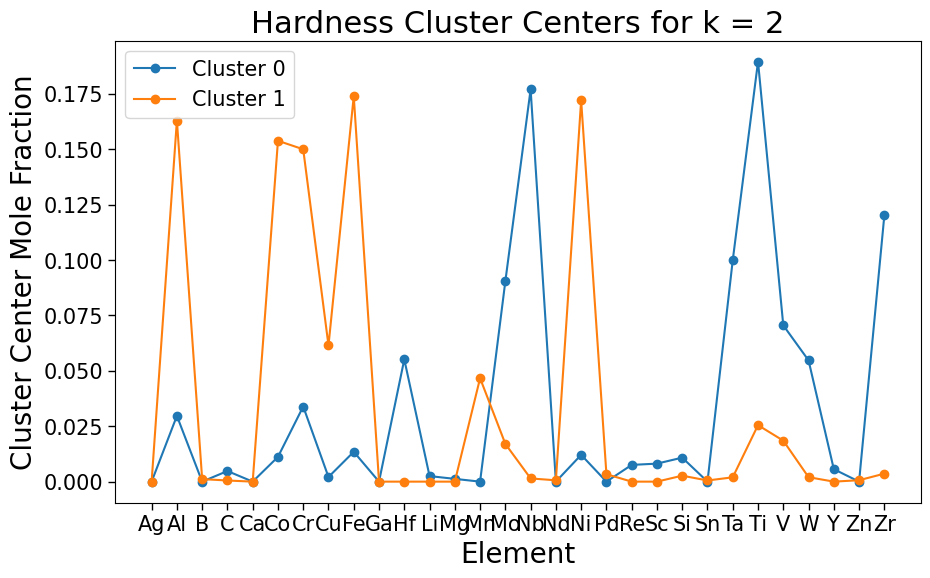

Cluster 0:
15 Nb
24 Ti
29 Zr

Cluster 1:
1 Al
5 Co
6 Cr
8 Fe
17 Ni


In [ ]:
### PERFORM K-MEANS CLUSTERING (k = 2) ###

def k_means(k, X, elems):

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    y_predict = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(10.4,6))
    plt.rcParams.update({'font.size':12})

    # Plot cluster centers
    for i in range(k):
        plt.plot(elems, centroids[i], label = "Cluster " + str(i), marker = 'o')
    plt.xlabel("Element", fontsize=20)
    plt.ylabel("Cluster Center Mole Fraction", fontsize=20)
    plt.title("Hardness Cluster Centers for k = " + str(k), fontsize=22)
    plt.legend()
    plt.show()

    return centroids, y_predict

centroids, y_predict = k_means(2,X,elems)

# Print significant elements in Cluster 0
cluster_peaks0 = [15,24,29]
print("Cluster 0:")
for i in cluster_peaks0:
    print(i, elems[i])
print()

# Print significant elements in Cluster 1
cluster_peaks1 = [1,5,6,8,17]
print("Cluster 1:")
for i in cluster_peaks1:
    print(i, elems[i])

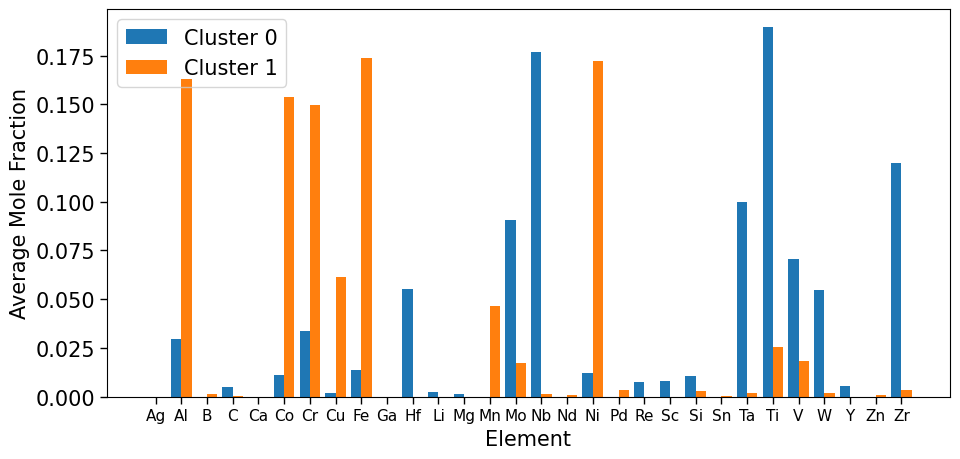

In [ ]:
def cluster_bar_graph(elems, centroid0, centroid1):

    bar_width = 0.4  # Width of the bars

    # Position of bars on the x-axis
    n = len(elems)
    index = np.arange(n)

    # Plotting
    fig, ax = plt.subplots(figsize=(10,5))

    bar1 = ax.bar(index, centroid0, bar_width, label='Cluster 0')
    bar2 = ax.bar(index + bar_width, centroid1, bar_width, label='Cluster 1')

    # Labels, title and legend
    ax.set_title('Hardness Cluster Centroids', fontsize=17)
    ax.set_xlabel('Element', fontsize=15)
    ax.set_ylabel('Average Mole Fraction', fontsize=15)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(elems)
    ax.legend()

    ax.tick_params(axis='x', which='major', labelsize=11)

    plt.show()

cluster_bar_graph(elems, centroids[0], centroids[1])

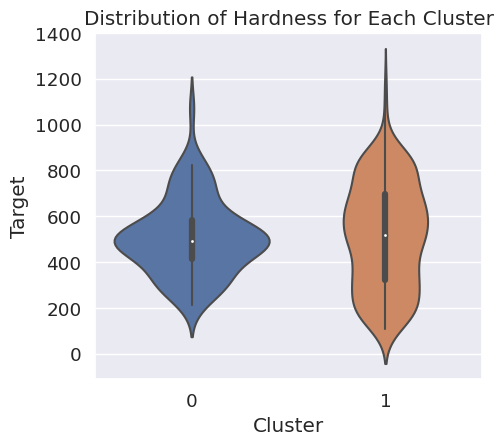

In [6]:
### VIOLIN PLOT ###
mpea_hardness_full['Cluster'] = y_predict
fig = plt.figure(figsize=(5,4.5))
sns.set_theme(font_scale=1.2)
sns.violinplot(data=mpea_hardness_full, x="Cluster", y="Target").set(title="Distribution of Hardness for Each Cluster")
plt.show()

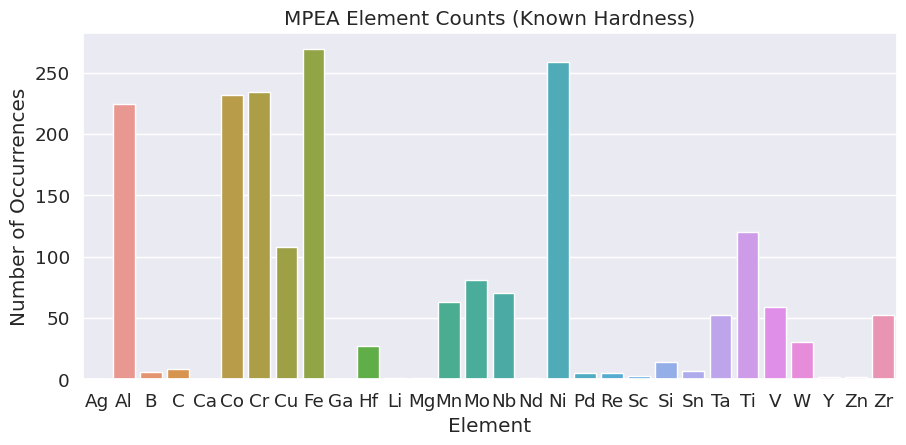

In [7]:
### ELEMENT COUNT PLOT ###

"""
Get a list of element counts for the given DataFrame
"""
def get_elem_counts(df, elems):
    elem_counts = [0] * len(elems)
    for i in range(len(df)):
        for j in range(len(elems)):
            if (df.loc[i, elems[j]] > 0.0):
                elem_counts[j] += 1
    return elem_counts

# PBE bar plot
pbe_elem_counts = get_elem_counts(mpea_hardness, elems)
fig = plt.figure(figsize=(10.5,4.5))
pbe_elem_plot = sns.barplot(x=elems, y=pbe_elem_counts)
pbe_elem_plot.set(title='MPEA Element Counts (Known Hardness)', xlabel='Element', ylabel='Number of Occurrences')
plt.show()

In [8]:
### GENERATE A HARDNESS DATASET (2 clusters)

# Get number of alloys in each cluster
unique, counts = np.unique(y_predict, return_counts=True)
frac_clust0 = counts[0] / len(y_predict)
frac_clust1 = counts[1] / len(y_predict)

# Generate dataset of 1000 alloys based on clusters 
num_clust0 = int(np.ceil(1000*frac_clust0))
num_clust1 = int(np.ceil(1000*frac_clust1))
gen_alloys = [] # List of generated alloys
for i in range(num_clust0):
    gen_alloys.append(generate_alloy(centroids[0], min_elems=4, min_frac=0.1))
for j in range(num_clust1):
    gen_alloys.append(generate_alloy(centroids[1], min_elems=4, min_frac=0.1))

print(gen_alloys)


### SAVE DATASET TO CSV

df = pd.DataFrame(gen_alloys, columns=elems)
cluster_labels = num_clust0*[0] + num_clust1*[1]
df["Cluster"] = cluster_labels
print(df)
#df.to_csv("gen_MPEA_hardness0.1-0.35(1).csv", index=False)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.16, 0.0, 0.28, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31], [0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.17, 0.0, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19], [0.0, 0.21, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.22, 0.0, 0.0, 0.0, 0.22, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.18, 0.0, 0.0, 0.0, 0.1, 0.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17, 0.19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0], [0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.16], [0.0, 0.18, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.18], [0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.0, 0.0, 0.0, 0